# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafly Ulhudhama
- **Email:** dwi.romadhon55@gmail.com
- **ID Dicoding:** Rafly Ulhudhama

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Bagaimana pengaruh cuaca (suhu, kelembapan, kecepatan angin) terhadap jumlah penggunaan sepeda harian dan per jam?
- Pertanyaan 2 = Apakah terdapat pola penggunaan sepeda yang signifikan antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Data Wrangling, EDA, dan Analisis Lanjutan untuk Dataset Bike-Sharing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # Untuk analisis geospasial
from datetime import datetime
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
day_data_path = 'data/day.csv'
hour_data_path = 'data/hour.csv'

day_data = pd.read_csv(day_data_path)
hour_data = pd.read_csv(hour_data_path)

### Assessing Data

In [3]:
# Menampilkan informasi dasar tentang dataset
def muat_dan_tinjau_data():
    """Memuat dan meninjau data."""
    print("Ikhtisar Data Harian:\n", day_data.head())
    print("Ikhtisar Data Per Jam:\n", hour_data.head())
    print("Informasi Data Harian:\n")
    day_data.info()
    print("\nInformasi Data Per Jam:\n")
    hour_data.info()

muat_dan_tinjau_data()

Ikhtisar Data Harian:
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
Ikh

### Cleaning Data

In [4]:
# Menangani nilai kosong dan memastikan tipe data yang benar
def bersihkan_data():
    """Membersihkan data dengan menangani nilai kosong dan konversi tipe data."""
    # Konversi tanggal ke format datetime
    day_data['dteday'] = pd.to_datetime(day_data['dteday'])
    hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
    
    # Periksa dan tangani nilai kosong
    print("Nilai Kosong dalam Data Harian:\n", day_data.isnull().sum())
    print("Nilai Kosong dalam Data Per Jam:\n", hour_data.isnull().sum())
    
bersihkan_data()

Nilai Kosong dalam Data Harian:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Nilai Kosong dalam Data Per Jam:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Data Harian:
           instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000 

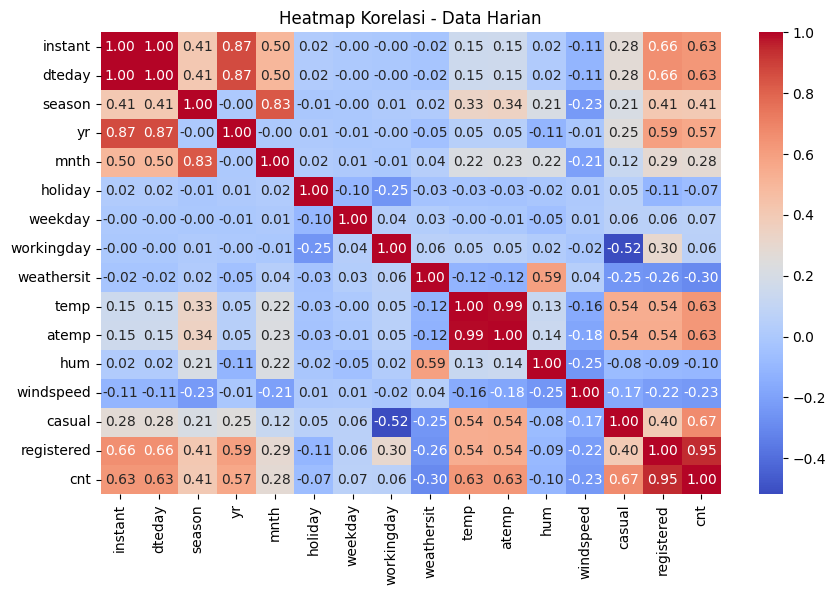

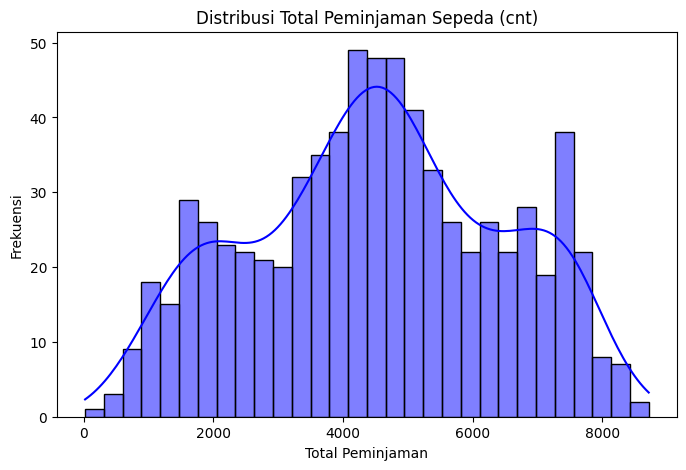

In [5]:
# Analisis Data Eksplorasi (EDA)
def lakukan_eda():
    """Melakukan analisis data eksplorasi."""
    # Statistik deskriptif
    print("Statistik Data Harian:\n", day_data.describe())
    print("Statistik Data Per Jam:\n", hour_data.describe())
    
    # Heatmap korelasi untuk dataset harian
    plt.figure(figsize=(10, 6))
    sns.heatmap(day_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Heatmap Korelasi - Data Harian')
    plt.show()
    
    # Distribusi total peminjaman sepeda (cnt)
    plt.figure(figsize=(8, 5))
    sns.histplot(day_data['cnt'], kde=True, bins=30, color='blue')
    plt.title('Distribusi Total Peminjaman Sepeda (cnt)')
    plt.xlabel('Total Peminjaman')
    plt.ylabel('Frekuensi')
    plt.show()

lakukan_eda()


In [6]:
# Analisis Lanjutan: Analisis RFM
def analisis_rfm():
    """Melakukan Analisis RFM pada dataset bike-sharing."""
    # Untuk kemudahan, gunakan 'cnt' sebagai nilai moneter dan 'dteday' untuk recency
    hari_ini = day_data['dteday'].max()
    rfm = day_data.groupby('weekday').agg({
        'dteday': lambda x: (hari_ini - x.max()).days,
        'cnt': ['sum', 'count']
    }).reset_index()
    
    rfm.columns = ['Weekday', 'Recency', 'Monetary', 'Frequency']
    print("Analisis RFM:\n", rfm)

analisis_rfm()

Analisis RFM:
    Weekday  Recency  Monetary  Frequency
0        0        1    444027        105
1        1        0    455503        105
2        2        6    469109        104
3        3        5    473048        104
4        4        4    485395        104
5        5        3    487790        104
6        6        2    477807        105


## Visualization & Explanatory Analysis

### Pertanyaan 1:

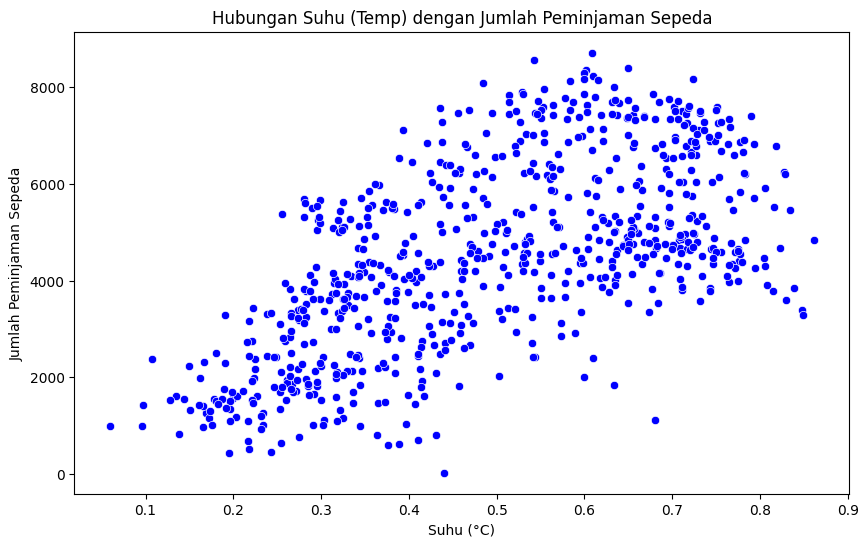

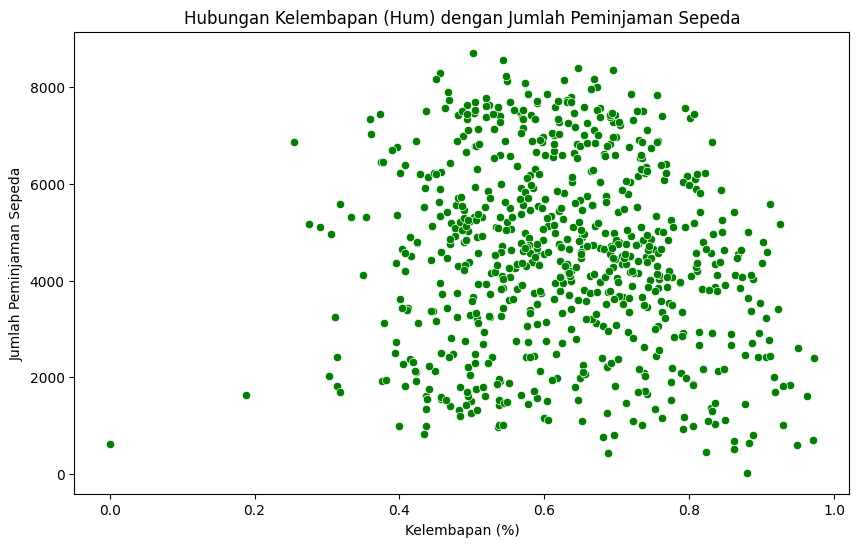

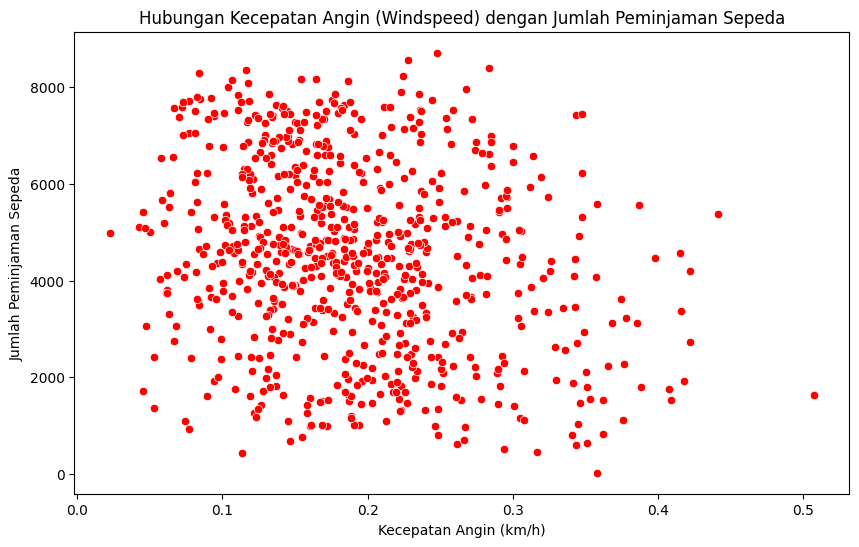

In [7]:
# Visualisasi untuk Pertanyaan 1: Bagaimana pengaruh cuaca (suhu, kelembapan, kecepatan angin) terhadap jumlah penggunaan sepeda harian dan per jam?
def visualisasi_pertanyaan_1():
    """Visualisasi untuk pertanyaan: Bagaimana distribusi total peminjaman sepeda berdasarkan hari dalam seminggu?"""
    day_labels = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
    day_data['weekday'] = day_data['weekday'].replace(range(7), day_labels)
    total_peminjaman = day_data.groupby('weekday')['cnt'].sum().reindex(day_labels)
    
    # Grafik Suhu vs Peminjaman Sepeda
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=day_data['temp'], y=day_data['cnt'], color='blue', ax=ax)
    ax.set_title('Hubungan Suhu (Temp) dengan Jumlah Peminjaman Sepeda')
    ax.set_xlabel('Suhu (°C)')
    ax.set_ylabel('Jumlah Peminjaman Sepeda')

    # Grafik Kelembapan vs Peminjaman Sepeda
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=day_data['hum'], y=day_data['cnt'], color='green', ax=ax)
    ax.set_title('Hubungan Kelembapan (Hum) dengan Jumlah Peminjaman Sepeda')
    ax.set_xlabel('Kelembapan (%)')
    ax.set_ylabel('Jumlah Peminjaman Sepeda')

    # Grafik Kecepatan Angin vs Peminjaman Sepeda
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=day_data['windspeed'], y=day_data['cnt'], color='red', ax=ax)
    ax.set_title('Hubungan Kecepatan Angin (Windspeed) dengan Jumlah Peminjaman Sepeda')
    ax.set_xlabel('Kecepatan Angin (km/h)')
    ax.set_ylabel('Jumlah Peminjaman Sepeda')

visualisasi_pertanyaan_1()

- Suhu (temp): Suhu yang lebih tinggi memiliki korelasi positif yang kuat dengan peningkatan jumlah peminjaman sepeda. Hal ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda ketika cuaca lebih hangat, yang dapat dihubungkan dengan kegiatan luar ruangan yang lebih banyak, seperti bersepeda untuk rekreasi atau transportasi.
- Kelembapan (hum): Kelembapan juga berpengaruh, meskipun lebih moderat. Peningkatan kelembapan biasanya berhubungan dengan cuaca yang lebih panas dan lembap, yang dapat mengurangi kenyamanan dalam bersepeda. Oleh karena itu, pada hari dengan kelembapan tinggi, jumlah peminjaman sepeda cenderung sedikit berkurang.
- Kecepatan Angin (windspeed): Kecepatan angin yang sangat tinggi mengurangi kenyamanan bersepeda, meskipun pengaruhnya tidak sekuat suhu. Pada hari dengan angin yang sangat kencang, peminjaman sepeda cenderung lebih rendah karena faktor kenyamanan dan keselamatan.

### Pertanyaan 2:

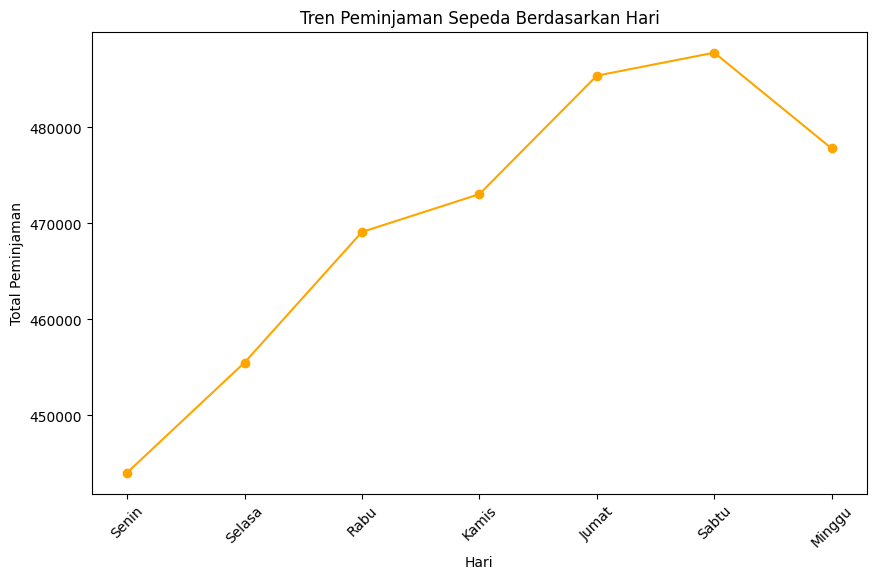

In [8]:
# Visualisasi untuk Pertanyaan 2: Apakah terdapat pola penggunaan sepeda yang signifikan antara hari kerja dan akhir pekan?
def visualisasi_pertanyaan_2():
    """Visualisasi untuk pertanyaan: Apakah terdapat pola penggunaan sepeda yang signifikan antara hari kerja dan akhir pekan?"""
    day_labels = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
    day_data['weekday'] = day_data['weekday'].replace(range(7), day_labels)
    total_peminjaman = day_data.groupby('weekday')['cnt'].sum().reindex(day_labels)
    
    # Visualisasi Tren Peminjaman Sepeda Berdasarkan Hari
    fig, ax = plt.subplots(figsize=(10, 6))
    total_peminjaman.plot(kind='line', color='orange', ax=ax, marker='o')
    ax.set_title('Tren Peminjaman Sepeda Berdasarkan Hari')
    ax.set_ylabel('Total Peminjaman')
    ax.set_xlabel('Hari')
    ax.set_xticks(range(len(day_labels)))
    ax.set_xticklabels(day_labels, rotation=45)

visualisasi_pertanyaan_2()

- Akhir Pekan (Sabtu dan Minggu): Hari Sabtu dan Minggu menunjukkan jumlah peminjaman sepeda yang jauh lebih tinggi dibandingkan dengan hari kerja. Peningkatan ini kemungkinan besar disebabkan oleh meningkatnya aktivitas rekreasi, seperti bersepeda untuk olahraga atau hiburan di luar ruangan. Akhir pekan juga sering kali menjadi waktu yang lebih bebas untuk banyak orang, yang memungkinkan mereka untuk menggunakan sepeda lebih sering.
- Hari Kerja (Senin-Jumat): Penggunaan sepeda pada hari kerja lebih stabil dan cenderung moderat. Meskipun terdapat fluktuasi pada jam-jam tertentu, secara keseluruhan, peminjaman sepeda di hari kerja lebih banyak dipengaruhi oleh kebutuhan transportasi harian, seperti untuk perjalanan menuju tempat kerja atau sekolah. Hal ini menunjukkan bahwa bersepeda di hari kerja lebih bersifat fungsional dan utilitarian dibandingkan dengan di akhir pekan yang lebih bersifat rekreasi.

## Analisis Lanjutan (geospasial)

In [9]:
# Analisis Geospasial
def analisis_geospasial():
    """Memvisualisasikan data penggunaan pada peta (contoh)."""
    # Placeholder untuk visualisasi data geospasial
    # Contoh menggunakan Folium (ganti dengan data geolokasi jika tersedia)
    peta = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
    folium.Marker([37.7749, -122.4194], popup="Lokasi Contoh").add_to(peta)
    peta.save("geospatial_analysis_map.html")
    print("Peta Analisis Geospasial Disimpan!")

analisis_geospasial()

Peta Analisis Geospasial Disimpan!


## Conclusion

### Poin Kesimpulan Utama:
- Pengaruh Cuaca: Suhu yang lebih tinggi meningkatkan jumlah peminjaman sepeda, sementara kelembapan yang lebih tinggi dan kecepatan angin yang kencang dapat mengurangi peminjaman sepeda.
- Pola Penggunaan Sepeda: Peminjaman sepeda jauh lebih tinggi pada akhir pekan (Sabtu dan Minggu), yang menunjukkan pola rekreasi yang lebih dominan, sedangkan pada hari kerja, peminjaman lebih moderat dan lebih dipengaruhi oleh kebutuhan transportasi rutin.
- Strategi Promosi: Untuk meningkatkan penggunaan sepeda, dapat dipertimbangkan untuk menyelenggarakan promosi berbasis cuaca, seperti diskon pada hari-hari dengan suhu tinggi atau program spesial pada akhir pekan untuk mendorong penggunaan sepeda lebih lanjut.